# Visualizing BO results

In [59]:
import numpy as np 

# read the npy data from results
data = np.load('./results/lipo_rdkit_ratio0.05_iter3_trial3.npy', allow_pickle=True).item()

In [60]:
num_trial = len(data['bests_over_trials'])
num_iter = len(data['bests_over_trials'][0])
best_observed = np.array(data['bests_over_trials'])

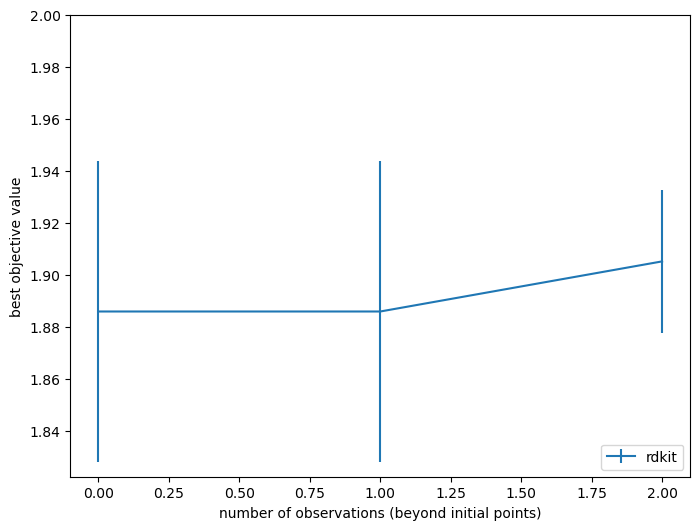

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
def ci(y):
    return 1.96 * y.std(axis=0) / np.sqrt(num_trial)

#plot the df data and add 
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
#plot errorbar from the mean and std of the best observed value
ax.errorbar(x=np.arange(num_iter), y=best_observed.mean(axis=0), yerr=ci(best_observed), label="rdkit", linewidth=1.5)
#set labels
ax.set(
    xlabel="number of observations (beyond initial points)",
    ylabel="best objective value",
)
ax.set_ylim(top=2.0)
ax.legend(loc="lower right")